In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

from luwiji.time_series import illustration

# Error-Trend-Seasonal (ETS) Smoothing method

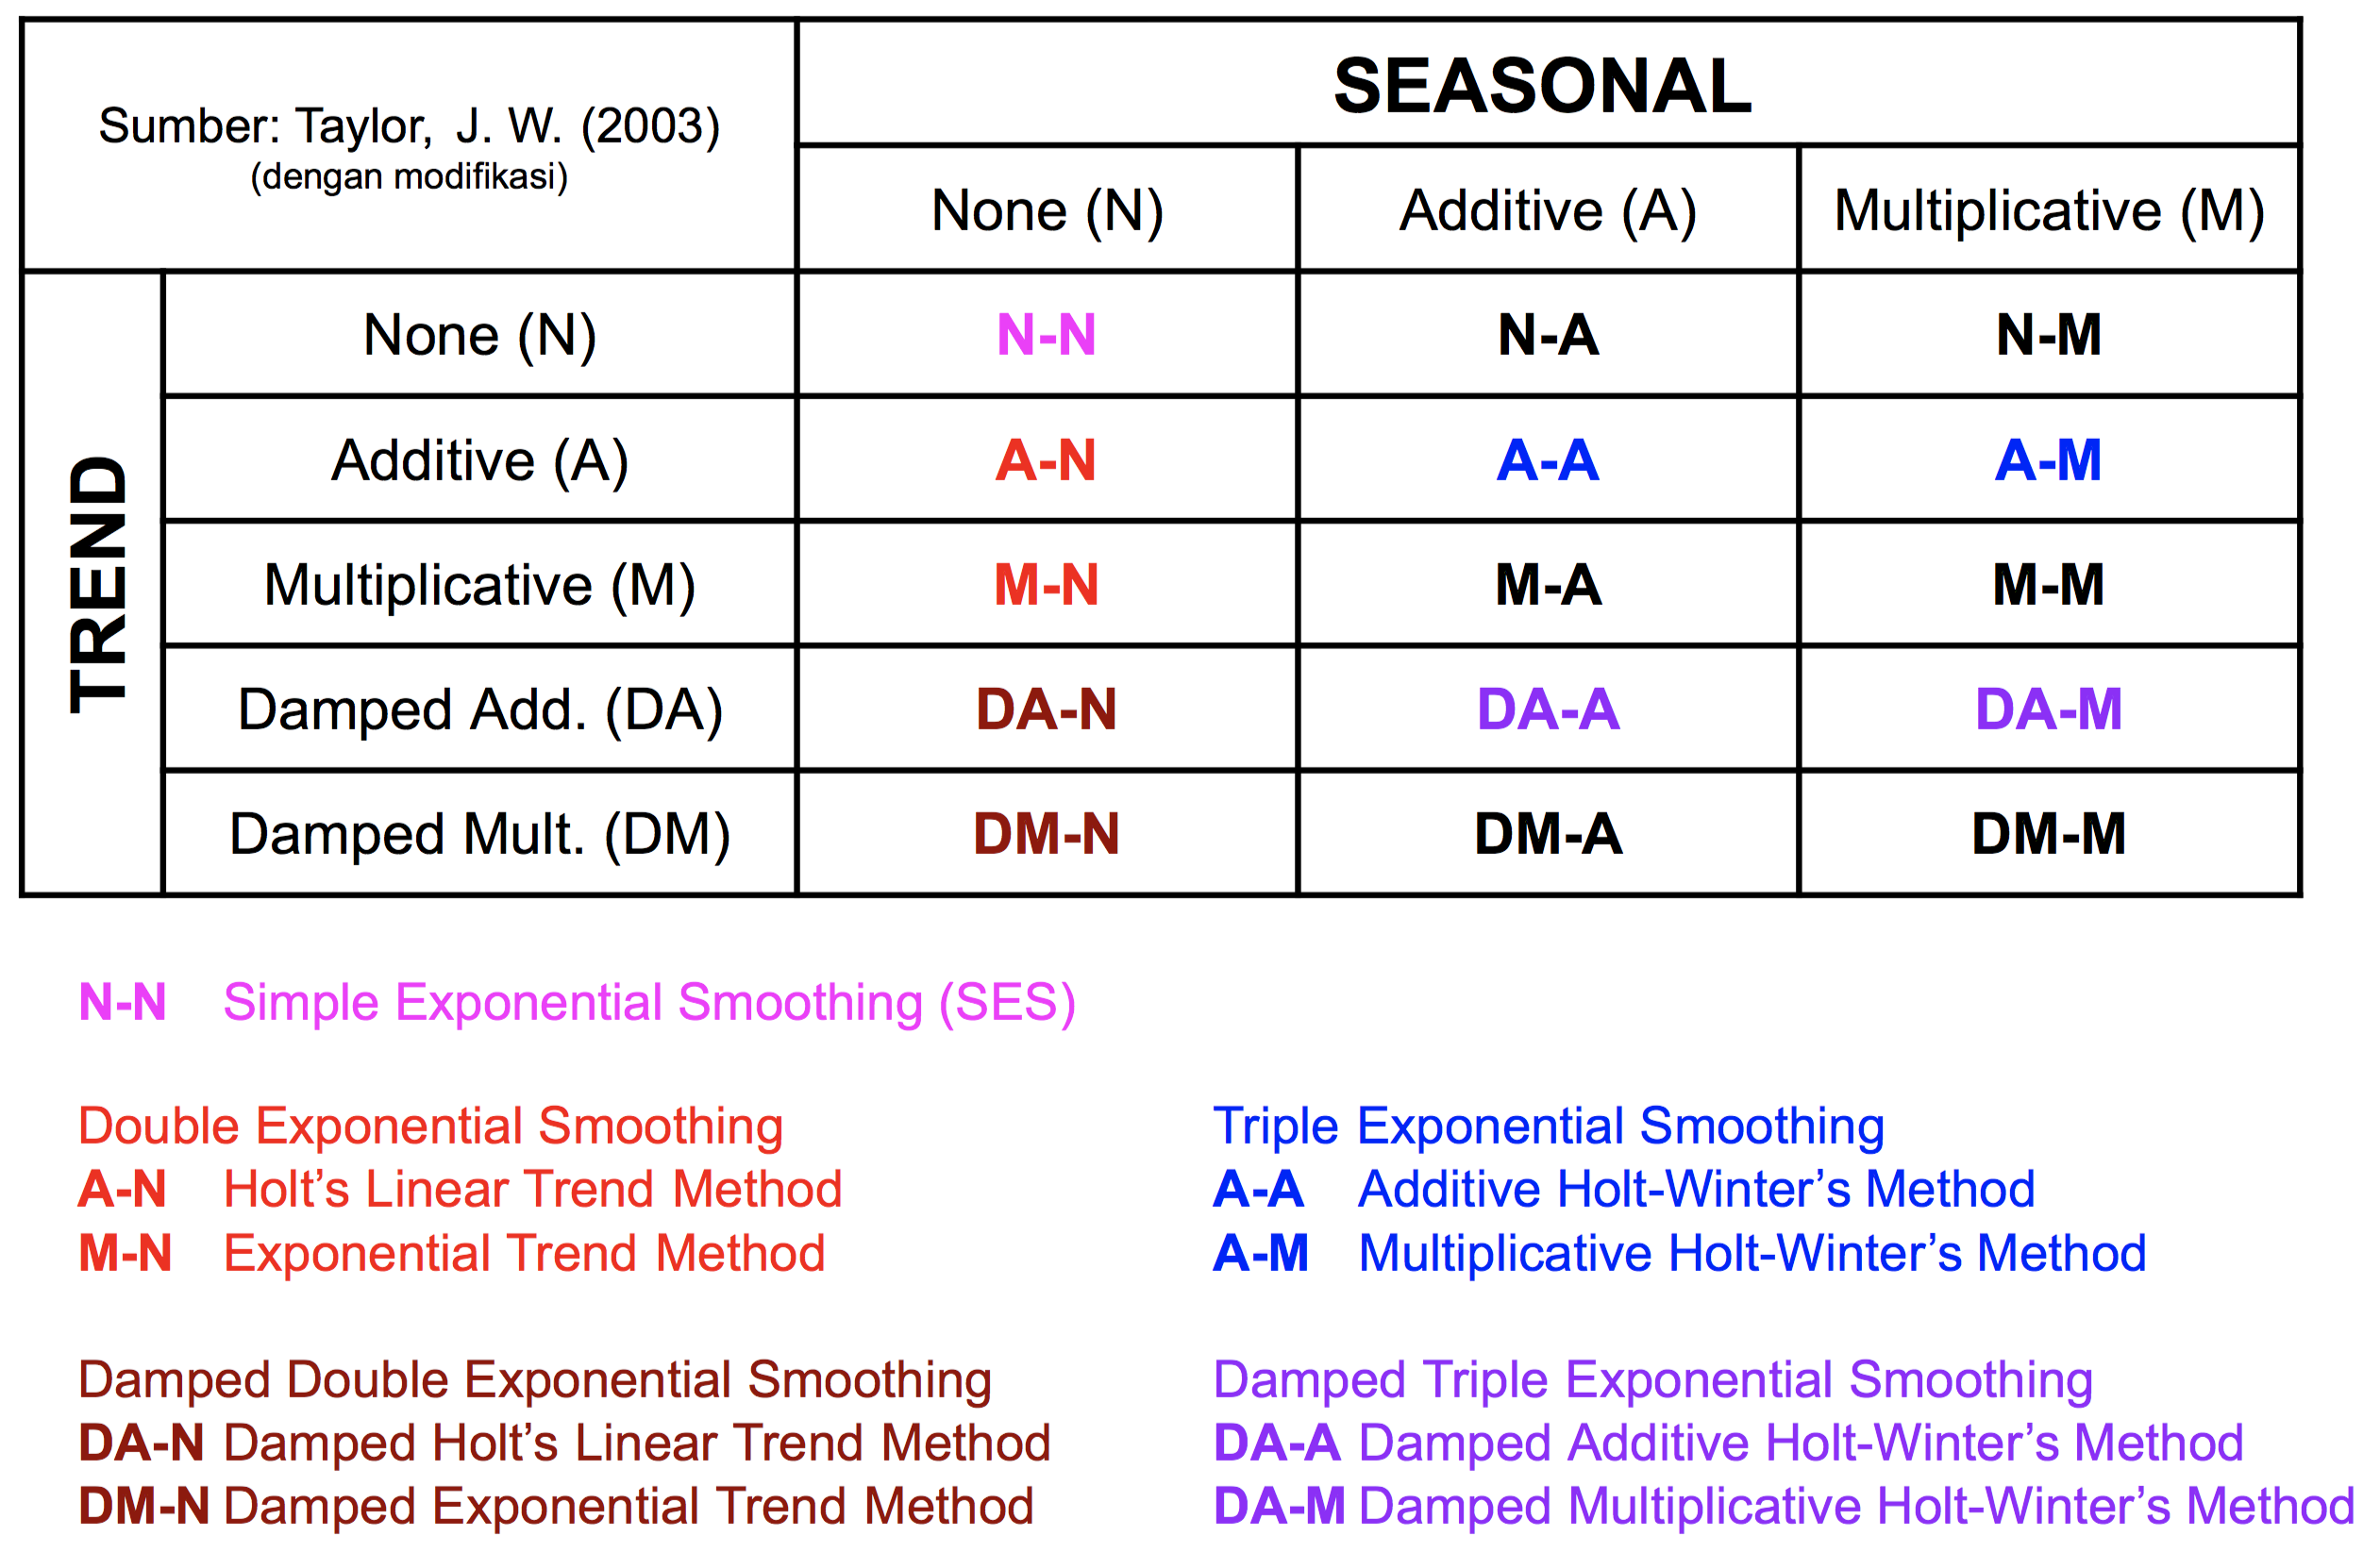

In [2]:
illustration.ets_model

## Excercise 1: Cheese Production Data

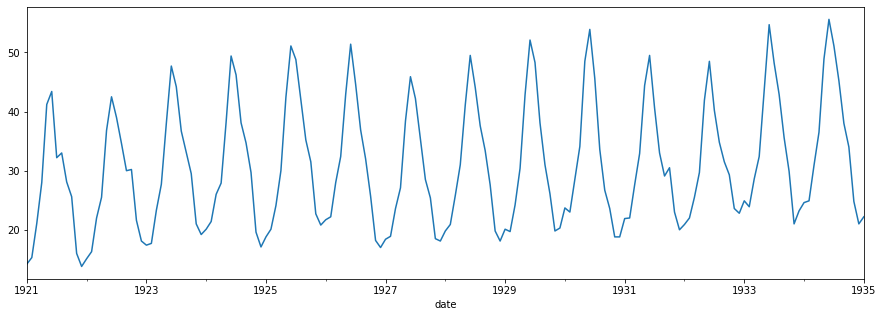

In [3]:
df = pd.read_csv("../datasets/cheese_fred.csv", index_col='date', parse_dates=['date'])
series = df["total_cheese_production"]
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15, 5))

In [4]:
es = ExponentialSmoothing(X_train, seasonal='add', seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True)

C:\Users\ROG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ROG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ROG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\ROG\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [5]:
len(X_train)

144

In [7]:
# Forecast
pred = model.predict(len(X_train)-10, len(X_train)+50)

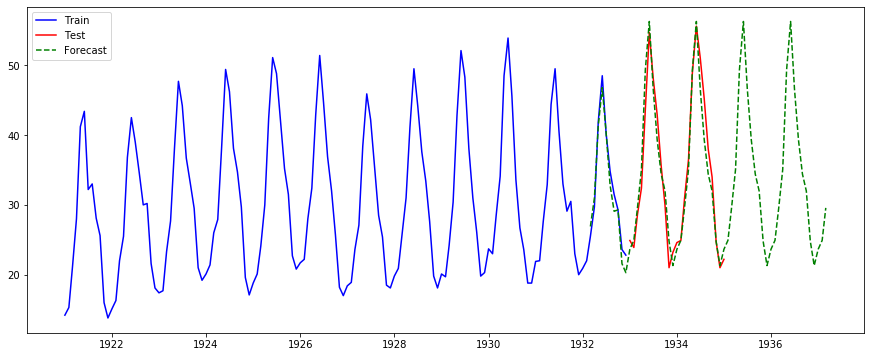

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(X_train, "b-", label="Train")
plt.plot(X_test, "r-", label="Test")
plt.plot(pred, "g--", label="Forecast")

plt.legend()
plt.show()

## Excercise 2: Airline Passenger Data

In [ ]:
df = pd.read_csv("../datasets/airline.csv", index_col='Date', parse_dates=['Date'])
series = df["passengers"]
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15, 5))